In [1]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import camb
import pandas as pd
import healpy as hp
from camb import model, initialpower
import useful_functions as uf
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = 12, 16

Nside=512
Nside_red=16
tau=(0.06,0.06)
r=(0.0,0.0)
n_test=10
n_channels=2
pol=1 #2
res=hp.nside2resol(Nside_red) 
sensitivity=4 #muK-arcmin

input_folder="/home/amorelli/foreground_noise_maps/noise_maps_d0s0_test/"
input_files=os.listdir(input_folder)
for j in range(len(input_files)):
        input_files[j]=input_folder+"/"+input_files[j]
maps_per_cl_gen=uf.maps_per_cl(distribution=0)
maps_per_cl=maps_per_cl_gen.compute_maps_per_cl([tau[0]],n_train=n_test,n_train_fix=n_test)

seed_test=7
np.random.seed(seed_test)# i set a seed for the generation of the maps and the a_lm. I use a seed for reproducibility.

data=uf.generate_cl(n_spectra=1,Nside=Nside,Nside_red=Nside_red,tau_interval=tau,r_interval=r,raw=1,verbose=0)


noise_maps=uf.generate_noise_maps(n_train=n_test,n_channels=n_channels,nside=Nside_red,pol=2,
                                      sensitivity=sensitivity,input_files=input_files)
noise_E,noise_B=uf.convert_to_EB(noise_maps)

mappe,y_tau=uf.generate_maps(data, r=[tau[0]],n_train=n_test,nside=Nside_red, beam_w=2*res, noise_maps=noise_E,
                                map_per_cl=maps_per_cl, kind_of_map="EE", raw=1 , n_channels=n_channels,beam_yes=1 , verbose=0) 

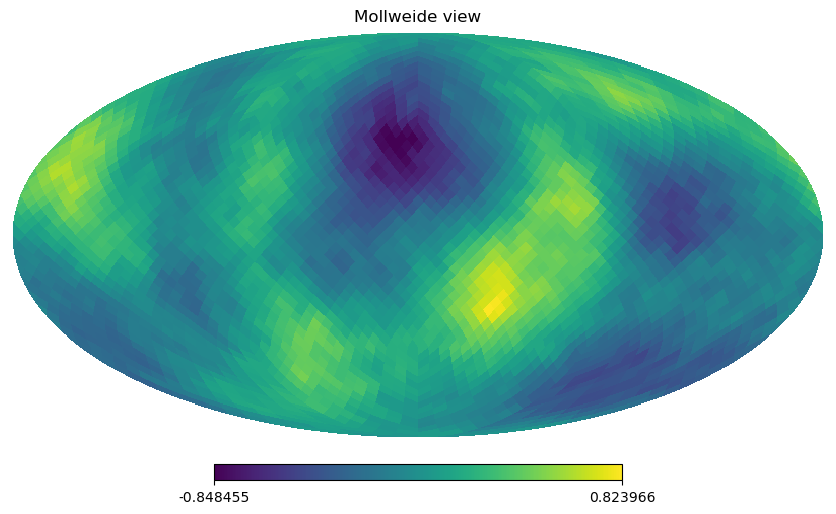

In [2]:
hp.mollview(mappe[6,:,0])

In [10]:
masked=uf.mask_it(mappe,path="/home/amorelli/HFI_Mask_GalPlane-apo0_2048_R2.00.fits",
                  field=[0,2],nside_low=Nside_red,nside_high=2048,mode=1)

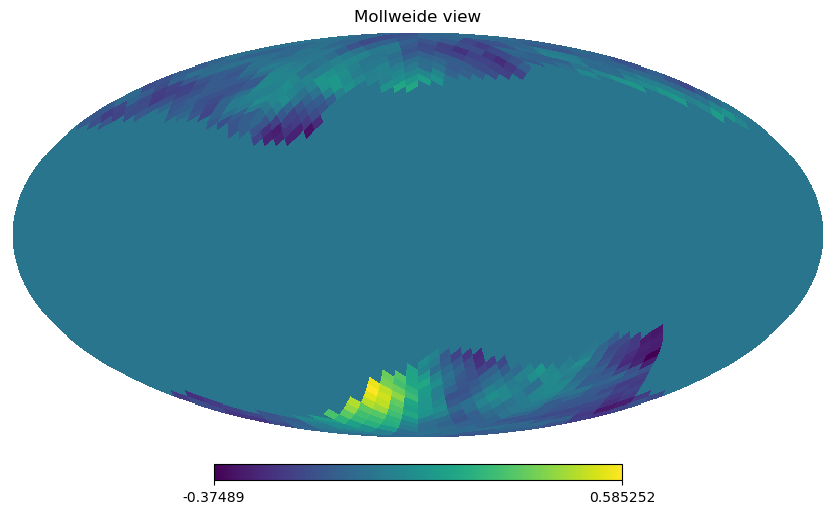

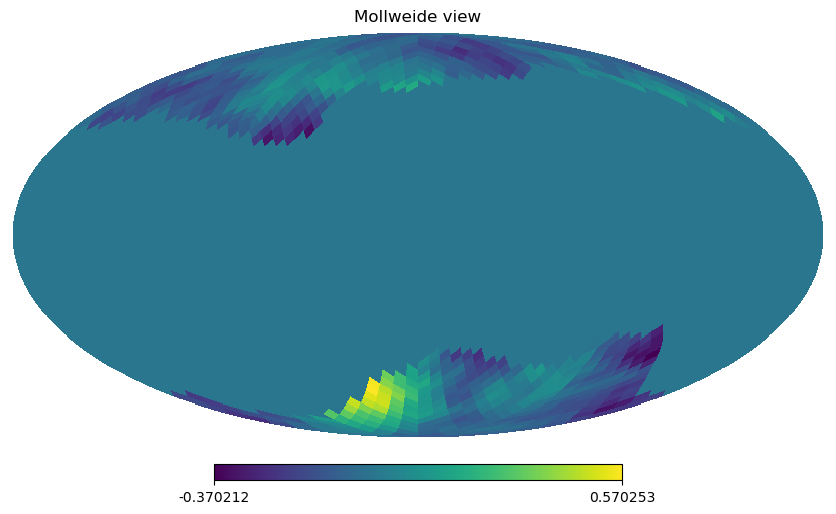

In [14]:
#hp.mollview(masked[6,:,1]-masked[6,:,3])
hp.mollview(masked[3,:,0])
hp.mollview(masked[3,:,1])